# **Data Visualisation**

## Objectives

* Answer business requirements:
 - Determine the population distribution of butterfly and moth population, based on data collected so far.
 - Present a visual average of each cllassification, and determine whether this can assist in educating researchers in collecting the data.
 - Present a visual varience of each classification, and determine if this can assist in educating researchers in diferenitating between species.
 - Create an image montage of random selections of each classification, for reference.

## Inputs

* inputs/butterfly_moth/images/test
* inputs/butterfly_moth/images/validation
* inputs/butterfly_moth/images/train

## Outputs

* Distribution of population per label plot.
* Average and variablity of images per label plot.
* Image montage of each classification.

## Additional Comments

* No comments.



---

## Library Imports and Working Directory Change

In [27]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import itertools
import random
import numpy as np
import plotly.express as px
import joblib
from matplotlib.image import imread
from tensorflow.keras.preprocessing import image
from PIL import Image
sns.set_style('white')

In [2]:
cwd = os.getcwd()
cwd

'/workspace/portfolio-project-5/jupyter_notebooks'

In [3]:
os.chdir('/workspace/portfolio-project-5/')
print("You set a new current directory")

You set a new current directory


In [4]:
work_dir = os.getcwd()
work_dir

'/workspace/portfolio-project-5'

---

# Set Directories

## Input

Set train, validation and test paths.

In [5]:
img_data_dir = 'inputs/butterfly_moth/images'
train_path = img_data_dir + '/train'
test_path = img_data_dir + '/test'
validation_path = img_data_dir + '/validation'

## Output

In [6]:
version = 'v1'
file_path = f'outputs/{version}'

if 'outputs' in os.listdir(work_dir) and version in os.listdir(work_dir + '/outputs'):
  print('Old version is already available create a new version.')
  pass
else:
  os.makedirs(name=file_path)

Old version is already available create a new version.


Set label name.

In [7]:
labels = os.listdir(train_path)
print(f'Labels: {labels}')

Labels: ['adonis', 'african_giant_swallowtail', 'american_snoot', 'an_88', 'appollo', 'arcigera_flower_moth', 'atala', 'atlas_moth', 'banded_orange_heliconian', 'banded_peacock', 'banded_tiger_moth', 'beckers_white', 'bird_cherry_ermine_moth', 'black_hairstreak', 'blue_morpho', 'blue_spotted_crow', 'brookes_birdwing', 'brown_argus', 'brown_siproeta', 'cabbage_white', 'cairns_birdwing', 'chalk_hill_blue', 'checquered_skipper', 'chestnut', 'cinnabar_moth', 'clearwing_moth', 'cleopatra', 'clodius_parnassian', 'clouded_sulphur', 'comet_moth', 'common_banded_awl', 'common_wood-nymph', 'copper_tail', 'crecent', 'crimson_patch', 'danaid_eggfly', 'eastern_coma', 'eastern_dapple_white', 'eastern_pine_elfin', 'elbowed_pierrot', 'emperor_gum_moth', 'garden_tiger_moth', 'giant_leopard_moth', 'glittering_sapphire', 'gold_banded', 'great_eggfly', 'great_jay', 'green_celled_cattleheart', 'green_hairstreak', 'grey_hairstreak', 'hercules_moth', 'humming_bird_hawk_moth', 'indra_swallow', 'io_moth', 'iph

---

# Image Shape

Determine if the images are all the same size, if not, what is the average shape.

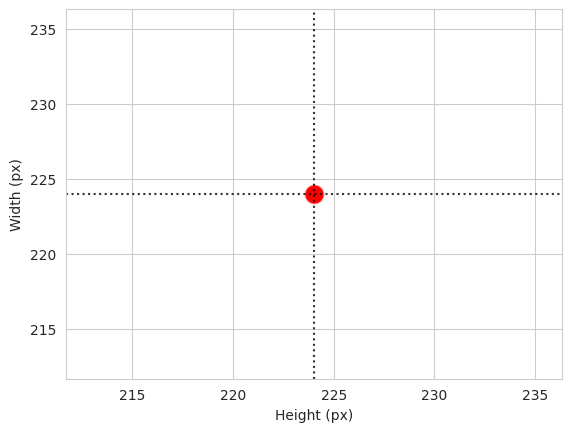

Average width is 224.
 Average height is 224
Height and width match for all images. All images are the same size.


In [8]:
width = []
height = []

for label in labels:
    for img_name in os.listdir(train_path + '/' + label):
        image = imread(train_path + '/' + label + '/' + img_name)
        h, w, colors = image.shape
        height.append(h)
        width.append(w)


sns.set_style('whitegrid')
fig, axes = plt.subplots()
sns.scatterplot(x=height, y=width, alpha=0.4, s=200, color='red')
axes.set_xlabel('Height (px)')
axes.set_ylabel('Width (px)')
mean_height = int(np.array(height).mean())
mean_width = int(np.array(width).mean())
axes.axvline(x=mean_height, color='black', linestyle=':', alpha=0.8)
axes.axhline(y=mean_width, color='black', linestyle=':', alpha=0.8)
plt.show()
print(f'Average width is {mean_width}.\n Average height is {mean_height}')


height_array = np.array(height)
width_array = np.array(width)
unique_height = np.unique(height_array)
unique_width = np.unique(width_array)

if len(unique_height) == 1 and len(unique_width) == 1:
    print('Height and width match for all images. All images are the same size.')



Save image shape.

In [9]:
image_shape = (mean_height, mean_width, 3) 
image_shape

(224, 224, 3)

---

# Average Image and Image Variability

Load test set images as an array.

In [21]:
def load_images_as_array(data, new_size=(50,50), n_images_per_label=70):

    X, y = np.array([], dtype='int'), np.array([], dtype='object')

    for label in labels:
        counter = 0
    for image_filename in os.listdir(data + '/' + label):
      if counter < n_images_per_label:
        
        img = image.load_img(data + '/' + label + '/' + image_filename, target_size=new_size)
        if image.img_to_array(img).max() > 1: 
          img_resized = image.img_to_array(img) / 255
        else: 
          img_resized = image.img_to_array(img)
        
        X = np.append(X, img_resized).reshape(-1, new_size[0], new_size[1], img_resized.shape[2])
        y = np.append(y, label)
        counter += 1

    return X, y


In [23]:
X, y = load_images_as_array(data=test_path, new_size=(50,50), n_images_per_label=70)
print(X.shape, y.shape)

(23, 50, 50, 3) (23,)


Plot average image and image variability.

In [24]:
def plot_average_and_variability_of_images(X, y, figsize, save_image=False):

    for label in np.unique(y):

        sns.set_style('white')

        y = y.reshape(-1,1,1)
        boolean_mask = np.any(y==label, axis=1).reshape(-1)
        label_img = X[boolean_mask]
        
        avg_img = np.mean(label_img, axis=0)
        img_var = np.std(label_img, axis=0)

        fig, axes = plt.subplots(nrows=1, ncols=2, figsize=figsize)

        axes[0].imshow(avg_img, cmap='gray')
        axes[0].set_title(f'{label} - Average Image')

        axes[1].imshow(img_var)
        axes[1].set_title(f'{label} - Image Variability')

        if save_image:
            plt.savefig(f"{file_path}/avg_var_{label_to_display}.png", bbox_inches='tight', dpi=150)
        else:
            plt.tight_layout()
            plt.show()

In [ ]:
plot_average_and_variability_of_images(X=X, y=y, figsize=(15,10),save_image=False)

---

# Image Montage

Create an image montage that consists of 6 images from each label.

In [52]:
def create_image_montage(data, label, nrows, ncols, figsize):
    
    if label in labels:
        montage = os.listdir(data + '/' + label)
        if nrows * ncols < len(montage):
            img_index = random.sample(montage, nrows * ncols)
        else:
            print('Error - not enough images for montage.')
            print('Please decreace "ncols" or "nrows".')

    montage_rows = range(0, nrows)
    montage_cols = range(0, ncols)
    montage_plot = list(itertools.product(montage_rows, montage_cols))

    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=figsize)
    for x_images in range(0, nrows * ncols):
        img = imread(data + '/' + label + '/' + img_index[x_images])
        img_shape = img.shape
        fig.suptitle((f'{label.replace("_"," ").title()}'))
        axes[montage_plot[x_images][0], montage_plot[x_images][1]].imshow(img)
    plt.tight_layout()
    plt.show()



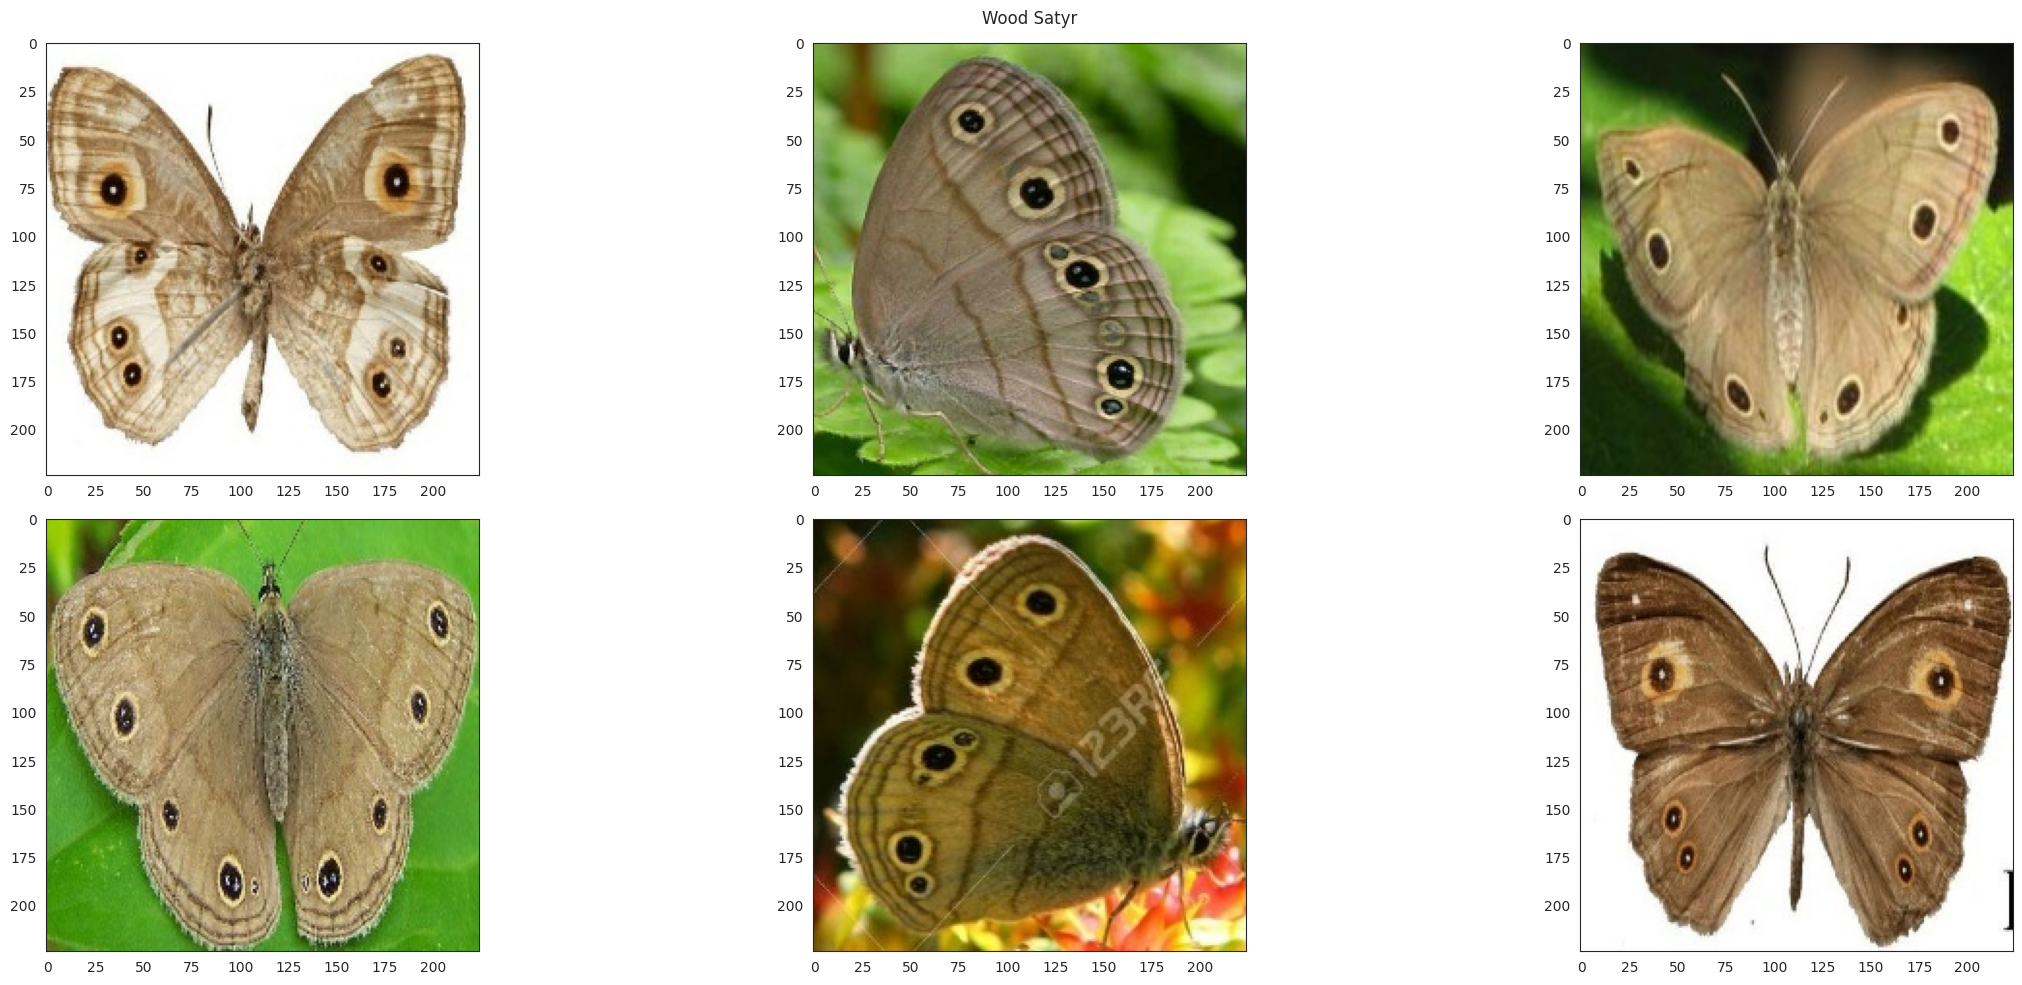

In [53]:
create_image_montage(data=test_path, label='wood_satyr', nrows=2, ncols=3, figsize=(25,10))


---

# Population Distribution

Determine the total population and the population distribution based on the recorded data so far.

In [ ]:
image_data = []

for label in labels:
    species = os.path.join(train_path, label)
    count = len([name for name in os.listdir(species) if os.path.isfile(os.path.join(species, name))])

    image_data.append({'Species': label, 'Recorded Population': count})

species_df = pd.DataFrame(image_data)
total_population = species_df['Recorded Population'].sum()

print(species_df)
print(f'Total Recorded Population: {total_population}')

Plot the total population by species, with the Y axis starting at 60 as the lowest population is in the 70's.

In [ ]:
population = species_df['Recorded Population']
species = species_df['Species']

plt.figure(figsize=(25,10))
plt.bar(species, population, color='green')
plt.ylim(ymin=60)
plt.xlabel('Species')
plt.ylabel('Population')
plt.title('Population Distribution')
plt.xticks(rotation=90)
plt.show()

---

# Push files to Repo

* If you don't need to push files to Repo, you may replace this section with "Conclusions and Next Steps" and state your conclusions and next steps.

In [ ]:
# import os
# try:
#     # create here your folder
#     # os.makedirs(name='')
# except Exception as e:
#     print(e)
